In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinatins.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citypy module to determine city based on latitude and longitude. 
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Import the requests library. 
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [8]:
#requests.get(url+"&q=Boston").json()

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# loop through all the cities in the list. 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

# Run an API request for each of the cities. 
    try: 
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dunedin
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | shingu
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | lorengau
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | lavrentiya
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | jadu
Processing Record 13 of Set 1 | odweyne
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | staraya russa
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | balsas
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | mitsamiouli
Processing Record 22 of Set 1 | saskylakh
Processing Record 23 of Set 1 |

City not found. Skipping...
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | ancud
Processing Record 44 of Set 4 | varkaus
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | barrow
Processing Record 48 of Set 4 | condega
Processing Record 49 of Set 4 | kaitangata
Processing Record 50 of Set 4 | prince rupert
Processing Record 1 of Set 5 | gogrial
Processing Record 2 of Set 5 | manzhouli
Processing Record 3 of Set 5 | novomykolayivka
Processing Record 4 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 5 | gushikawa
Processing Record 6 of Set 5 | naruto
Processing Record 7 of Set 5 | leningradskiy
Processing Record 8 of Set 5 | xinxiang
Processing Record 9 of Set 5 | montepuez
Processing Record 10 of Set 5 | lebu
Processing Record 11 of Set 5 | juneau
Processing Record 12 of Set 5 | barcelos
Processing Record 13 of Set 5 | nurota
Processing Record 14 of Set 5 | net

Processing Record 29 of Set 8 | provost
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | bathsheba
Processing Record 32 of Set 8 | dhidhdhoo
Processing Record 33 of Set 8 | coihaique
Processing Record 34 of Set 8 | valky
Processing Record 35 of Set 8 | puerto escondido
Processing Record 36 of Set 8 | kavaratti
Processing Record 37 of Set 8 | longlac
City not found. Skipping...
Processing Record 38 of Set 8 | tarko-sale
Processing Record 39 of Set 8 | jalu
Processing Record 40 of Set 8 | maningrida
Processing Record 41 of Set 8 | kirovskiy
Processing Record 42 of Set 8 | nouadhibou
Processing Record 43 of Set 8 | zhanakorgan
Processing Record 44 of Set 8 | praya
Processing Record 45 of Set 8 | manicore
Processing Record 46 of Set 8 | fortuna
Processing Record 47 of Set 8 | kavieng
Processing Record 48 of Set 8 | goedereede
Processing Record 49 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 50 of Set 8 | tual
Processing Record 1 of Set 9 | sorvag
C

Processing Record 19 of Set 12 | kitimat
Processing Record 20 of Set 12 | itupiranga
Processing Record 21 of Set 12 | marcona
City not found. Skipping...
Processing Record 22 of Set 12 | lumberton
Processing Record 23 of Set 12 | bonnyville
Processing Record 24 of Set 12 | lavumisa
Processing Record 25 of Set 12 | antalaha
Processing Record 26 of Set 12 | inirida
Processing Record 27 of Set 12 | fomboni
Processing Record 28 of Set 12 | martapura
Processing Record 29 of Set 12 | meiganga
Processing Record 30 of Set 12 | sterling
Processing Record 31 of Set 12 | ponta delgada
Processing Record 32 of Set 12 | andros town
Processing Record 33 of Set 12 | salalah
Processing Record 34 of Set 12 | merauke
Processing Record 35 of Set 12 | banda aceh
Processing Record 36 of Set 12 | aflu
City not found. Skipping...
Processing Record 37 of Set 12 | stornoway
Processing Record 38 of Set 12 | sinnamary
Processing Record 39 of Set 12 | acarau
Processing Record 40 of Set 12 | wukari
Processing Recor

In [11]:
len(city_data)

572

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dunedin,-45.8742,170.5036,58.80,54,0,3.00,NZ,2021-09-22 23:17:07
1,Dikson,73.5069,80.5464,35.56,98,100,8.70,RU,2021-09-22 23:18:25
2,Bambous Virieux,-20.3428,57.7575,70.21,83,40,11.50,MU,2021-09-22 23:18:25
3,Shingu,33.7333,135.9833,76.19,68,1,4.97,JP,2021-09-22 23:18:26
4,Mataura,-46.1927,168.8643,55.47,40,7,2.86,NZ,2021-09-22 23:18:26
5,Port Alfred,-33.5906,26.8910,60.37,82,36,20.33,ZA,2021-09-22 23:15:52
6,Lorengau,-2.0226,147.2712,82.04,79,97,8.99,PG,2021-09-22 23:18:27
7,Nikolskoye,59.7035,30.7861,46.29,74,100,3.11,RU,2021-09-22 23:18:27
8,Bredasdorp,-34.5322,20.0403,60.28,93,49,1.14,ZA,2021-09-22 23:18:27
9,Lavrentiya,65.5833,-171.0000,33.42,56,26,4.68,RU,2021-09-22 23:18:28


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dunedin,NZ,2021-09-22 23:17:07,-45.8742,170.5036,58.80,54,0,3.00
1,Dikson,RU,2021-09-22 23:18:25,73.5069,80.5464,35.56,98,100,8.70
2,Bambous Virieux,MU,2021-09-22 23:18:25,-20.3428,57.7575,70.21,83,40,11.50
3,Shingu,JP,2021-09-22 23:18:26,33.7333,135.9833,76.19,68,1,4.97
4,Mataura,NZ,2021-09-22 23:18:26,-46.1927,168.8643,55.47,40,7,2.86
5,Port Alfred,ZA,2021-09-22 23:15:52,-33.5906,26.8910,60.37,82,36,20.33
6,Lorengau,PG,2021-09-22 23:18:27,-2.0226,147.2712,82.04,79,97,8.99
7,Nikolskoye,RU,2021-09-22 23:18:27,59.7035,30.7861,46.29,74,100,3.11
8,Bredasdorp,ZA,2021-09-22 23:18:27,-34.5322,20.0403,60.28,93,49,1.14
9,Lavrentiya,RU,2021-09-22 23:18:28,65.5833,-171.0000,33.42,56,26,4.68


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City ID")

In [15]:
weather_data_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv(weather_data_to_load)
city_data_df.head()

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Dunedin,NZ,2021-09-22 23:17:07,-45.8742,170.5036,58.80,54,0,3.00
1,1,Dikson,RU,2021-09-22 23:18:25,73.5069,80.5464,35.56,98,100,8.70
2,2,Bambous Virieux,MU,2021-09-22 23:18:25,-20.3428,57.7575,70.21,83,40,11.50
3,3,Shingu,JP,2021-09-22 23:18:26,33.7333,135.9833,76.19,68,1,4.97
4,4,Mataura,NZ,2021-09-22 23:18:26,-46.1927,168.8643,55.47,40,7,2.86


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

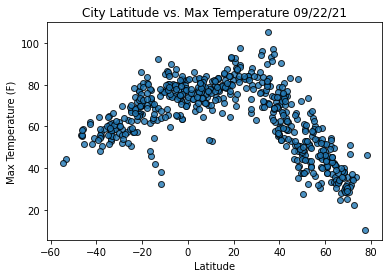

In [17]:
# Import the time module
import time

# Build the scatter plot for the latitude versus max temperature.
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid=(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

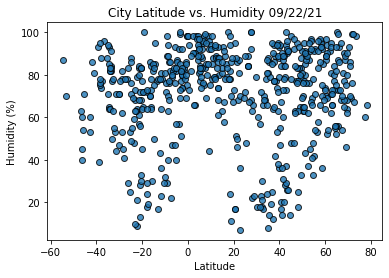

In [18]:
# Build the scatter plot for the latitude versus humidity.
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid=(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

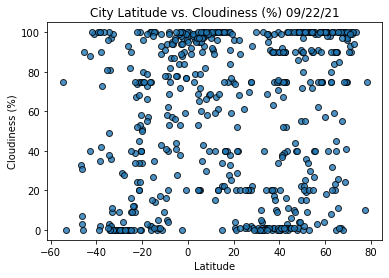

In [19]:
# Build the scatter plot for the latitude versus cloudiness.
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid=(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

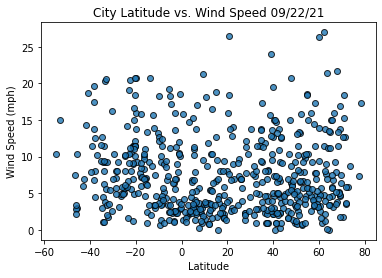

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid=True
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show the plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    

In [22]:
index13 = city_data_df.loc[13]
index13

City ID                        13
City                 Puerto Ayora
Country                        EC
Date          2021-09-22 23:18:29
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    69.85
Humidity                       86
Cloudiness                     77
Wind Speed                  10.11
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
567     True
568     True
569     True
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Dikson,RU,2021-09-22 23:18:25,73.5069,80.5464,35.56,98,100,8.70
3,3,Shingu,JP,2021-09-22 23:18:26,33.7333,135.9833,76.19,68,1,4.97
7,7,Nikolskoye,RU,2021-09-22 23:18:27,59.7035,30.7861,46.29,74,100,3.11
9,9,Lavrentiya,RU,2021-09-22 23:18:28,65.5833,-171.0000,33.42,56,26,4.68
10,10,Sitka,US,2021-09-22 23:15:55,57.0531,-135.3300,53.49,58,75,9.22


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

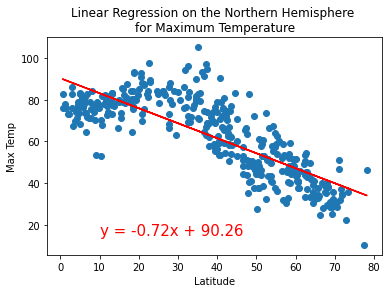

In [26]:
# Linear regression on the Northern Hemisphere for Maximum Temp.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n"
                       "for Maximum Temperature", "Max Temp",(10,15))

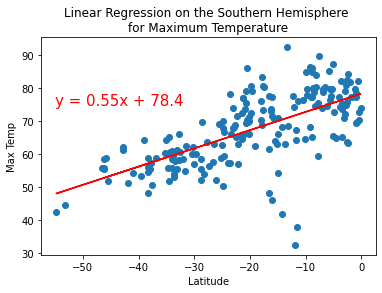

In [27]:
# Linear regression on the Southern Hemisphere for Maximum Temp.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                      "for Maximum Temperature", "Max Temp", (-55,75))

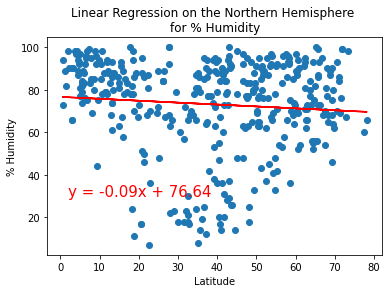

In [39]:
# Linear regression on the Northern Hemisphere for Humidity.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n"
                       "for % Humidity", "% Humidity",(2,30))

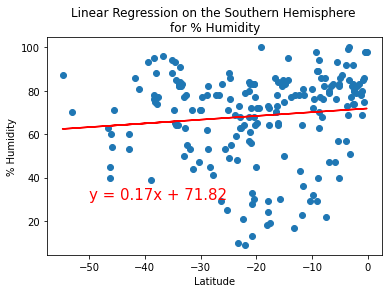

In [41]:
# Linear regression on the Southern Hemisphere for Humidity.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                      "for % Humidity", "% Humidity", (-50,30))

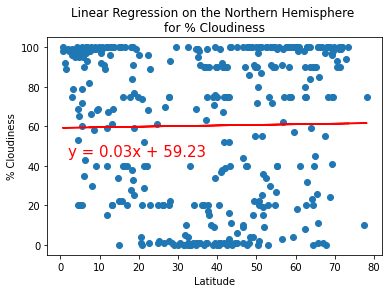

In [42]:
# Linear regression on the Northern Hemisphere for Cloudiness.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n"
                       "for % Cloudiness", "% Cloudiness",(2,45))

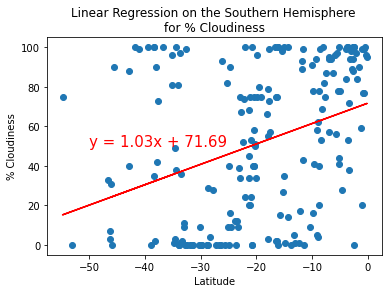

In [52]:
# Linear regression on the Southern Hemisphere for Cloudiness.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                       "for % Cloudiness", "% Cloudiness",(-50,50))

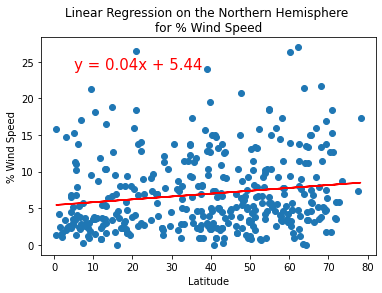

In [43]:
# Linear regression on the Northern Hemisphere for Wind Speed.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n"
                       "for % Wind Speed", "% Wind Speed",(5,24))

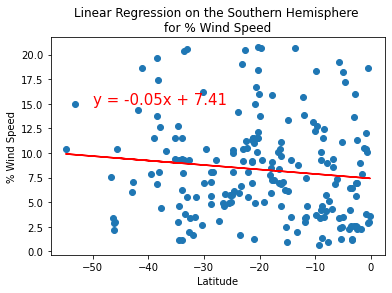

In [47]:
# Linear regression on the Southern Hemisphere for Wind Speed.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                       "for % Wind Speed", "% Wind Speed",(-50, 15))